# Project 2: Initial exploration and data visualization
*University of Ljubljana, Faculty for computer and information science* <br />
*Course: Introduction to data science*

## Environment setup

In the repository I included a yml file with all needed dependencies for this notebook to run.
You can create a conda environment with the following command:

`conda env create -f environment.yml`

After creating it, you activate it by `conda activate ids-proj-2`.
When you start jupyter notebook you need to select kernel with name `Python [conda env:ids-proj-2]`.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels

In [2]:
pd.options.mode.chained_assignment = None

# Exploration and data visualization

### Reading data

In [3]:
usage = pd.read_csv('data/Celtra platform usage data.csv')
sessions = pd.read_csv('data/Celtra sessions data.csv')

usage_small = usage[:100]
sessions_small = sessions[:100]

### Exploring data
First let's look at *Celtra platform usage data*.

In [4]:
print(f"Size of table: {usage.shape[0]} rows and {usage.shape[1]} columns.")

us_columns = usage.columns.values
for col in us_columns:
    print(f"Number of unique values in column {col}: {usage[col].nunique()}")

print(f"Number of unique dates in column TIMESTAMP: {pd.to_datetime(usage['TIMESTAMP']).dt.date.nunique()}")

print(f"Different activities: {', '.join(usage['ACTIVITY'].unique())}.")

print(f"Earliest date of usage: {usage['TIMESTAMP'].min()}")
print(f"Latest date of usage: {usage['TIMESTAMP'].max()}")

Size of table: 622078 rows and 6 columns.
Number of unique values in column ACCOUNT: 11
Number of unique values in column USER: 266
Number of unique values in column SESSION: 62693
Number of unique values in column ACTIVITYLOCATION: 48
Number of unique values in column ACTIVITY: 10
Number of unique values in column TIMESTAMP: 541547
Number of unique dates in column TIMESTAMP: 90
Different activities: campaign managing, distributing, providing/producing content, generating/updating/previewing batches, reviewing, using Ad Builder passivelly, producing creatives/templates, account/user managing, distributionPage/editFacebookAdSetDestinationDialog, socialLinkDialog.
Earliest date of usage: 2020-07-01 00:00:02.305
Latest date of usage: 2020-09-29 23:47:39.301


Next let's look at *Celtra sessions data*.

In [16]:
print(f"Size of table: {sessions.shape[0]} rows and {sessions.shape[1]} columns.")

sess_columns = sessions.columns.values
for col in sess_columns[[1, 3, 5, 7, 8]]:
    print(f"Number of unique values in column {col}: {sessions[col].nunique()}")

print(f"Different platforms: {', '.join(sessions['PLATFORM'].unique())}.")
print(f"Different SDKs: {', '.join(sessions['SDK'].unique())}.")

print(f"Earliest: {sessions['UTCDATE'].min()} and latest: {sessions['UTCDATE'].max()} date of gathered data.")

print(f"Earliest: {sessions['ACCOUNTCREATIONDATE'].min()} and latest: {sessions['ACCOUNTCREATIONDATE'].max()} "
      f"date of created account.")
print(f"Earliest: {sessions['CAMPAIGNCREATIONDATE'].min()} and latest: {sessions['CAMPAIGNCREATIONDATE'].max()} "
      f"date of created campaign.")
print(f"Earliest: {sessions['CREATIVECREATIONDATE'].min()} and latest: {sessions['CREATIVECREATIONDATE'].max()} "
      f"date of created creative.")

print(f"Number of columns where load attempts are not equal to requested sessions: "
      f"{sessions[sessions['REQUESTEDSESSIONS'] != sessions['CREATIVELOADATTEMPTS']].shape[0]}")

Size of table: 4823186 rows and 15 columns.
Number of unique values in column ACCOUNTID: 317
Number of unique values in column CAMPAIGNID: 15937
Number of unique values in column CREATIVEID: 62081
Number of unique values in column PLATFORM: 6
Number of unique values in column SDK: 8
Different platforms: Android, DesktopPlatform, IOS, WindowsPhone, BlackBerry, WebOS.
Different SDKs: MobileWeb, MRAID, VPAID, VAST, AppleNews, SafeFrame, AMP, Pandora.
Earliest: 2018-01-01 and latest: 2019-12-31 date of gathered data.
Earliest: 2012-04-24 18:34:11.000 and latest: 2019-10-18 21:56:34.000 date of created account.
Earliest: 2012-09-07 05:12:06.000 and latest: 2019-12-30 18:50:34.000 date of created campaign.
Earliest: 2012-10-31 20:21:25.000 and latest: 2019-12-31 20:28:55.000 date of created creative.
Number of columns where load attempts are not equal to requested sessions: 0


## Data statistics

### Platform usage statistics

Number of unique values for each account:

In [6]:
account_usage = usage.groupby('ACCOUNT').agg('nunique')
account_usage['COUNT'] = usage[['ACTIVITY', 'ACCOUNT']].groupby('ACCOUNT').agg('count')
account_usage.sort_values(by='COUNT', ascending=False)

,USER,SESSION,ACTIVITYLOCATION,ACTIVITY,TIMESTAMP,COUNT
ACCOUNT,,,,,,
9df97d11af95d9dbc708ae5a77c4db24,47,26120,35,8,243168,280228
9481f5ef6a333fe0ad4582790e456875,52,8067,39,10,64730,76503
7987ab2588c8a8a092088fe1e270eaea,53,11456,38,9,59412,68008
b556f8d7a889038878402eed730fd54e,29,6223,33,10,35278,41972
e2723e3632ebbba2d37d9bfc505e9987,4,833,27,7,29631,31145
ec4ee625edb37b5e628f487c59ecb6e1,11,1981,30,8,26303,30059
ee1007298840fccd45037a1ad5e400b5,27,2289,38,8,20984,24803
fdc66a33c7576bb859a751b42cd23552,11,2060,35,9,18447,21957
ffa6bfe68b18766d41e1b78a7f0904c7,7,1739,26,8,16713,18802


In [7]:
account_usage.agg('mean')

USER                   25.090909
SESSION              5699.363636
ACTIVITYLOCATION       32.636364
ACTIVITY                8.454545
TIMESTAMP           49233.181818
COUNT               56552.545455
dtype: float64

In [8]:
account_usage.agg('std')

USER                   18.619638
SESSION              7610.097020
ACTIVITYLOCATION        4.759679
ACTIVITY                0.934199
TIMESTAMP           66651.438038
COUNT               77020.106117
dtype: float64

Number of unique values for each activity:

In [9]:
activity_usage = usage.groupby('ACTIVITY').agg('nunique')
activity_usage['COUNT'] = usage[['ACTIVITY', 'ACCOUNT']].groupby('ACTIVITY').agg('count')
activity_usage.sort_values(by='COUNT', ascending=False)

,ACCOUNT,USER,SESSION,ACTIVITYLOCATION,TIMESTAMP,COUNT
ACTIVITY,,,,,,
using Ad Builder passivelly,11,90,26120,1,271743,278593
reviewing,11,197,36501,3,175437,200849
generating/updating/previewing batches,11,139,4109,7,38514,50925
campaign managing,11,223,4896,14,37127,44435
providing/producing content,11,84,1922,7,28955,29188
producing creatives/templates,11,56,6995,1,11275,11275
distributing,11,82,903,3,5045,5801
account/user managing,10,52,117,10,617,886
socialLinkDialog,4,1,48,1,112,112


Number of unique values for each activity location:

In [10]:
activityloc_usage = usage[['USER', 'SESSION', 'ACTIVITYLOCATION']].groupby('ACTIVITYLOCATION').agg('nunique')
activityloc_usage['COUNT'] = usage[['ACTIVITYLOCATION', 'ACCOUNT']].groupby('ACTIVITYLOCATION').agg('count')
activityloc_usage.sort_values(by='COUNT', ascending=False)[:10]

,USER,SESSION,COUNT
ACTIVITYLOCATION,,,
adBuilder,90,26120,278593
campaignExplorer,154,19838,155568
comments,197,23646,35382
accountCreativeAssets,134,3642,34401
campaignCreatives,156,3779,28353
feedEditor,43,1534,27679
massProductionDialog,52,640,12869
savedAdBuilder,56,6995,11275
previewPage,86,7086,9899


Usage grouped by users

In [11]:
users = usage.groupby('USER').agg('nunique')
users['COUNT'] = usage[['USER', 'ACCOUNT']].groupby('USER').agg('count')
users.sort_values(by='COUNT', ascending=False)[:10]

,ACCOUNT,SESSION,ACTIVITYLOCATION,ACTIVITY,TIMESTAMP,COUNT
USER,,,,,,
(anonymous),11,43585,7,5,102593,107054
9246f4a87be15c586c5aa079c05a8d32,1,4619,28,7,32010,36268
61810dbeecae42126c91cd3dffe84dba,1,3668,24,7,31605,34769
213425b62b649730f27d45afaf162384,1,1069,3,2,26895,31243
8b20bca7d2caf05bf9c28f833338f98d,1,1580,28,7,27003,30628
708925d194b03d9999897d3c9c06f903,1,508,27,7,29045,30294
6eae1350a9dfb7a8d92af91ca600f5e7,1,1691,22,7,20450,23752
6294da0f44c586947936cb4339018c37,1,1124,17,7,22152,23069
0251263e485428a60f1f8207c288ce2e,1,818,18,7,19152,21540


Anonymous user data

In [12]:
usage[usage['USER'] == '(anonymous)'].agg('nunique')

ACCOUNT                 11
USER                     1
SESSION              43585
ACTIVITYLOCATION         7
ACTIVITY                 5
TIMESTAMP           102593
dtype: int64

In [13]:
act_no_login = usage[usage['USER'] == '(anonymous)']['ACTIVITY'].unique()
print(f"Activities that can be used without log in: {', '.join(act_no_login)}")

Activities that can be used without log in: reviewing, using Ad Builder passivelly, socialLinkDialog, account/user managing, distributing


In [14]:
act_loc_no_login = usage[usage['USER'] == '(anonymous)']['ACTIVITYLOCATION'].unique()
print(f"Activity locations that can be used without log in: {', '.join(act_loc_no_login)}")

Activity locations that can be used without log in: campaignExplorer, comments, adBuilder, previewPage, socialLinkDialog, demoPage, creativeExport


In [15]:
usage_no_login = usage[usage['ACTIVITYLOCATION'].isin(act_loc_no_login)]
percentage = usage_no_login[usage_no_login['USER'] != '(anonymous)'].shape[0] / usage_no_login.shape[0] * 100
print(f"Users logged in {round(percentage, 2)}% of time when they didn't need to.")

Users logged in 77.74% of time when they didn't need to.


Maximum number of unique activities and activity locations in one session:

In [16]:
usage[['SESSION', 'ACTIVITY', 'ACTIVITYLOCATION']].groupby('SESSION').agg('nunique').agg('max')

ACTIVITY             5
ACTIVITYLOCATION    10
dtype: int64

### Sessions statistics

Unique values per one account, sorted by number of creatives:

In [17]:
sess_nuniq = sessions[sess_columns[[1, 3, 5, 7, 8]]].groupby('ACCOUNTID').agg('nunique')
sess_nuniq.sort_values(by='CREATIVEID', ascending=False)[:10]

,CAMPAIGNID,CREATIVEID,PLATFORM,SDK
ACCOUNTID,,,,
-2929392489040533399,767,4482,6,3
-4297909980524435574,116,2439,5,2
1138006091116774735,741,2243,6,2
4694226850353674593,285,2117,5,4
6340835793860707872,392,1774,6,2
-4680884227612423153,931,1547,6,5
-581035267500887928,171,1514,5,2
-3604285914516252637,518,1446,6,2
-1004360360460045256,149,1328,6,4


Unique values per one account, sorted by number of campaigns:

In [18]:
sess_nuniq.sort_values(by='CAMPAIGNID', ascending=False)[:10]

,CAMPAIGNID,CREATIVEID,PLATFORM,SDK
ACCOUNTID,,,,
-4680884227612423153,931,1547,6,5
-2929392489040533399,767,4482,6,3
1138006091116774735,741,2243,6,2
-3604285914516252637,518,1446,6,2
6340835793860707872,392,1774,6,2
3168721423292905416,364,903,6,3
1517010690963274645,339,534,6,2
-8156528699011014808,330,659,6,3
8551189207412142888,302,670,6,4


Maximum number of unique values per account:

In [19]:
sess_nuniq.agg('max')

CAMPAIGNID     931
CREATIVEID    4482
PLATFORM         6
SDK              5
dtype: int64

Maximum number of unique values per campaign:

In [20]:
sessions[sess_columns[[1, 3, 5, 7, 8]]].groupby('CAMPAIGNID').agg('nunique').agg('max')

ACCOUNTID       1
CREATIVEID    925
PLATFORM        6
SDK             4
dtype: int64

Maximum number of unique values per creative:

In [21]:
sessions[sess_columns[[1, 3, 5, 7, 8]]].groupby('CREATIVEID').agg('nunique').agg('max')

ACCOUNTID     1
CAMPAIGNID    1
PLATFORM      6
SDK           3
dtype: int64

Data by year

In [17]:
session_by_year = sessions[sess_columns[[0, 9, 10, 11, 12]]].copy()
session_by_year['UTCDATE'] = pd.to_datetime(sessions['UTCDATE']).dt.year

sum_by_year = session_by_year.groupby('UTCDATE').agg('sum')
sum_by_year

,REQUESTEDSESSIONS,LOADEDSESSIONS,RENDEREDSESSIONS,SESSIONSWITHINTERACTION
UTCDATE,,,,
2018,3847950898,2824978496,2121659574,46235147
2019,5598983633,4335730272,3396758975,65070471


Data by day

In [ ]:
session_by_day = sessions[sess_columns[[0, 9, 10, 11, 12, 13]]].copy()
session_by_day['UTCDATE'] = pd.to_datetime(sessions['UTCDATE']).dt.strftime('%m-%d')

sum_by_day = session_by_day.groupby('UTCDATE').agg('sum')

Successful sessions by year:

In [23]:
print(f"Percentage of successful sessions in year 2018: {round(sum_by_year.loc[2018, 'SESSIONSWITHINTERACTION'] / sum_by_year.loc[2018, 'REQUESTEDSESSIONS'] * 100, 2)}%")
print(f"Percentage of successful sessions in year 2019: {round(sum_by_year.loc[2019, 'SESSIONSWITHINTERACTION'] / sum_by_year.loc[2019, 'REQUESTEDSESSIONS'] * 100, 2)}%")



Percentage of successful sessions in year 2018: 1.2%
Percentage of successful sessions in year 2019: 1.16%


Day of the week

In [21]:
session_by_weekday = sessions[sess_columns[[0, 9, 10, 11, 12]]].copy()
session_by_weekday['UTCDATE'] = pd.to_datetime(sessions['UTCDATE']).dt.weekday

sum_by_weekday = session_by_weekday.groupby('UTCDATE').agg('sum')

# success by weekday
success_by_weekday = sum_by_weekday['SESSIONSWITHINTERACTION'] / sum_by_weekday['REQUESTEDSESSIONS']

success_by_weekday

UTCDATE
0    0.011347
1    0.011322
2    0.011479
3    0.011766
4    0.011742
5    0.012336
6    0.012502
dtype: float64

#### Campaigns

In [23]:
campaign_sessions = sessions[sess_columns[[0, 3, 5, 7, 8, 9, 12]]].copy()

campaigns_start_in = campaign_sessions[pd.to_datetime(sessions['CAMPAIGNCREATIONDATE']).dt.year >= 2018]
campaigns_start_in.loc[:, 'UTCDATE'] = pd.to_datetime(campaigns_start_in['UTCDATE'])

print(f"There is {campaigns_start_in['CAMPAIGNID'].nunique()} campaigns that haven't started before data acquisition.")

There is 12746 campaigns that haven't started before data acquisition.


Calculate the number of days from the start of campaign.

In [26]:
campaigns_start_in['DAYSFROMSTART'] = 0
for campaign in campaigns_start_in['CAMPAIGNID'].unique():
    campaign_df = campaigns_start_in[campaigns_start_in['CAMPAIGNID'] == campaign].copy()
    first_day = campaign_df['UTCDATE'].iloc[0]
    campaigns_start_in.loc[campaign_df.index, 'DAYSFROMSTART'] = (campaign_df['UTCDATE'] - first_day).dt.days

campaigns_start_in.to_csv('data/campaigns.csv', index=False)

To avoid unnecessary wait for calculations in next runs of notebook we write the table in csv and then read it.

In [6]:
campaigns_start_in = pd.read_csv('data/campaigns.csv')
campaigns_start_in['SUCCESS'] = campaigns_start_in['SESSIONSWITHINTERACTION'] / campaigns_start_in['REQUESTEDSESSIONS'] * 100

In [7]:
length_of_campaigns = campaigns_start_in[['CAMPAIGNID', 'DAYSFROMSTART']].groupby('CAMPAIGNID').agg('max') + 1
length_of_campaigns.rename(columns={'DAYSFROMSTART': 'LENGTH'}, inplace=True)
length_of_campaigns.describe()

,LENGTH
count,12746.000000
mean,107.502432
std,124.502682
min,1.000000
25%,29.000000
50%,57.000000
75%,134.000000
max,716.000000


In [28]:
print(f"Number of campaigns longer than 400 days: {length_of_campaigns[length_of_campaigns['LENGTH'] > 400].shape[0]}")
print(f"Number of campaigns longer than 500 days: {length_of_campaigns[length_of_campaigns['LENGTH'] > 500].shape[0]}")
print(f"Number of campaigns longer than 600 days: {length_of_campaigns[length_of_campaigns['LENGTH'] > 600].shape[0]}")


Number of campaigns longer than 400 days: 589
Number of campaigns longer than 500 days: 255
Number of campaigns longer than 600 days: 75


Success of campaigns on different platforms:

In [8]:
campaigns_platforms = campaign_sessions[['CAMPAIGNID', 'PLATFORM', 'REQUESTEDSESSIONS', 'SESSIONSWITHINTERACTION']]\
    .groupby(['CAMPAIGNID', 'PLATFORM']).agg('sum').reset_index()

campaigns_platforms['SUCCESS'] = campaigns_platforms['SESSIONSWITHINTERACTION'] / campaigns_platforms['REQUESTEDSESSIONS'] * 100

Unique values and number of sessions on each platform:

In [14]:
plat_data = sessions.groupby('PLATFORM').agg('nunique')[['CAMPAIGNID', 'CREATIVEID']]
plat_data.sort_values(by='CAMPAIGNID', ascending=False)

,CAMPAIGNID,CREATIVEID
PLATFORM,,
DesktopPlatform,14872,56865
Android,13963,52448
IOS,13874,52789
WindowsPhone,7127,18871
BlackBerry,4674,9696
WebOS,696,1045


Average success on platforms:

In [10]:
platform_success = campaigns_platforms.groupby('PLATFORM')['SUCCESS'].mean()
platform_success = platform_success.sort_values(ascending=False)
platform_success

PLATFORM
DesktopPlatform    7.616199
IOS                4.482506
Android            3.840410
WindowsPhone       1.024498
BlackBerry         0.748991
WebOS              0.166869
Name: SUCCESS, dtype: float64

## Data visualizations

### Platform usage visualizations

Usage of different activities throughout the day:

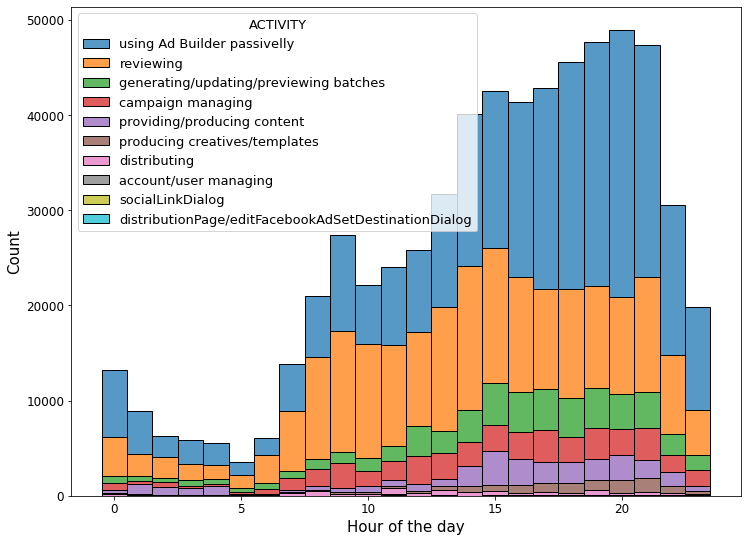

In [28]:
plt.figure(figsize=(12, 9))
plt.rcParams.update({'font.size': 13})
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=13)
activity_time = usage[['ACTIVITY', 'TIMESTAMP']]
activity_time['TIMESTAMP'] = pd.to_datetime(usage['TIMESTAMP']).dt.hour

# activities ordered by their usage
t = activity_time.groupby('ACTIVITY').agg('count').sort_values(by='TIMESTAMP', ascending=False)

g = sns.histplot(data=activity_time, x='TIMESTAMP', hue='ACTIVITY', discrete=True, legend=True, multiple="stack",
                 hue_order=t.index)
plt.xlabel('Hour of the day')
plt.savefig('report/fig/usage.png')
plt.show()

Usage of different activities throughout the week:

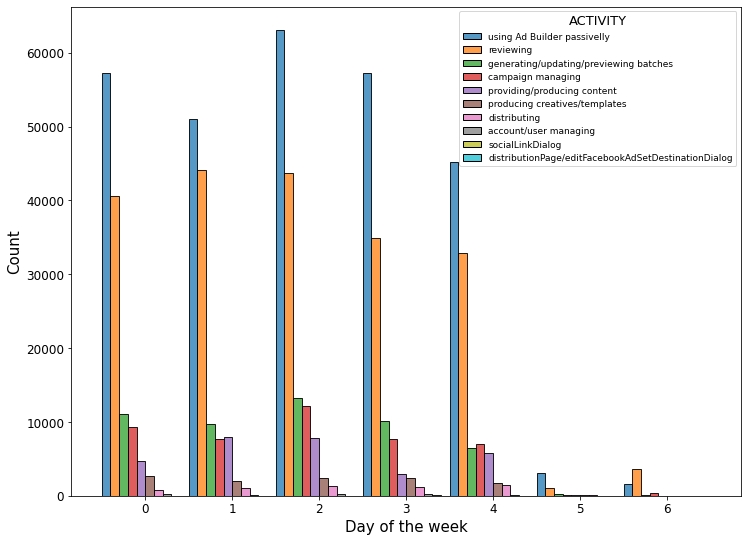

In [29]:
plt.figure(figsize=(12, 9))
plt.rc('legend', fontsize=9)
activity_time = usage[['ACTIVITY', 'TIMESTAMP']]
activity_time['TIMESTAMP'] = pd.to_datetime(usage['TIMESTAMP']).dt.weekday

# activities ordered by their usage
t = activity_time.groupby('ACTIVITY').agg('count').sort_values(by='TIMESTAMP', ascending=False)

g = sns.histplot(data=activity_time, x='TIMESTAMP', hue='ACTIVITY', discrete=True, legend=True, multiple="dodge",
                 hue_order=t.index)
plt.xlabel('Day of the week')
plt.show()

Number of sessions per account:

C:\Users\ursau\AppData\Local\Programs\Anaconda\envs\ids-proj-2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


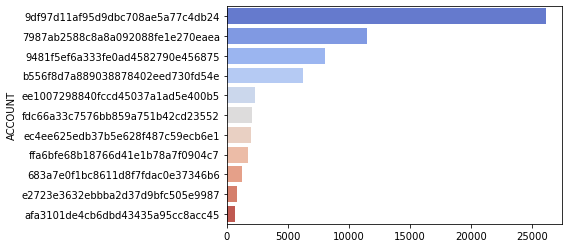

In [88]:
sess_per_acc = account_usage['SESSION'].sort_values(ascending=False)
sns.barplot(sess_per_acc.values, sess_per_acc.index, orient="h", palette="coolwarm")
plt.show()

Number of sessions per activity:

C:\Users\ursau\AppData\Local\Programs\Anaconda\envs\ids-proj-2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


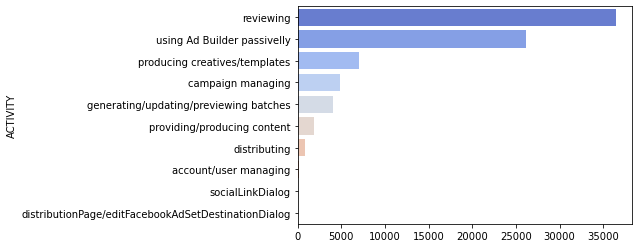

In [87]:
sess_per_act = activity_usage['SESSION'].sort_values(ascending=False)
sns.barplot(sess_per_act.values, sess_per_act.index, orient="h", palette="coolwarm")
plt.show()

### Sessions visualizations

Sum of requested, loaded, rendered and interacted with sessions in a certain year.

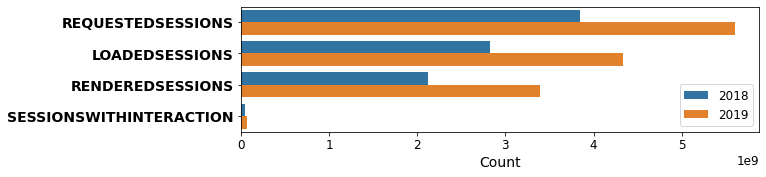

In [19]:
m = pd.melt(sum_by_year.reset_index(), id_vars='UTCDATE')

plt.figure(figsize=(12,3))
plt.gcf().subplots_adjust(left=0.3, bottom=0.3)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)
plt.rc('legend', fontsize=12)
plt.yticks(weight='bold')
g = sns.barplot(data=m, y='variable', x='value', hue='UTCDATE', orient='h')
g.legend(loc='lower right')
g.set_xlabel('Count')
g.set_ylabel('')
plt.savefig('report/fig/18-19.png')
plt.show()


#### Time of year

Sum of all requested sessions on certain day of the year (2018 + 2019):


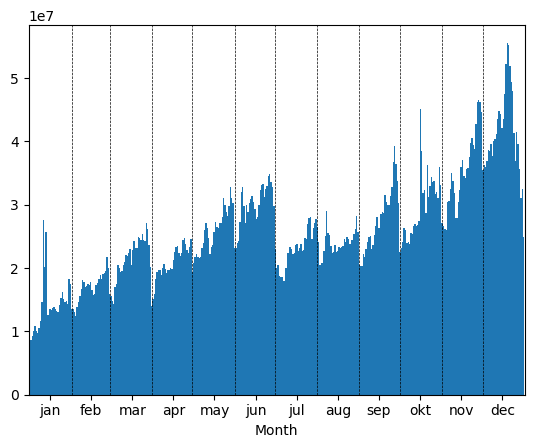

In [43]:
fig, ax = plt.subplots()
sum_by_day['REQUESTEDSESSIONS'].plot.bar(width=1)
for i in range(2,13):
    month = str(i) if i >= 10 else f"0{i}"
    ax.axvline(sum_by_day.index.searchsorted(f"{month}-01"), color="black", lw=0.5, linestyle="--", label="lancement")
ax.set_xticks([i*30.3 + 15 for i in range(12)])
ax.set_xticklabels(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'okt', 'nov', 'dec'], rotation=0)
ax.set_xlabel('Month')
plt.savefig('report/fig/sessions_year.png')

Sum of all sessions with interaction on certain day of the year (2018 + 2019):

Text(0.5, 0, 'Month')

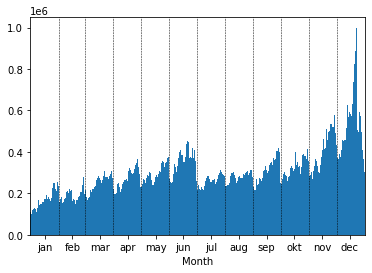

In [63]:
fig, ax = plt.subplots()
sum_by_day['SESSIONSWITHINTERACTION'].plot.bar(width=1)
for i in range(2,13):
    month = str(i) if i >= 10 else f"0{i}"
    ax.axvline(sum_by_day.index.searchsorted(f"{month}-01"), color="black", lw=0.5, linestyle="--", label="lancement")
ax.set_xticks([i*30.3 + 15 for i in range(12)])
ax.set_xticklabels(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'okt', 'nov', 'dec'], rotation=0)
ax.set_xlabel('Month')

Viewabletime on certain day of the year (2018 + 2019):
If we just look at sum of viewable time it is also bigger when there is more requested sessions,
but let's look at viewable time / requested sessions to see if the viewable time itself is connected to time of year.

Day with maximum: 08-08


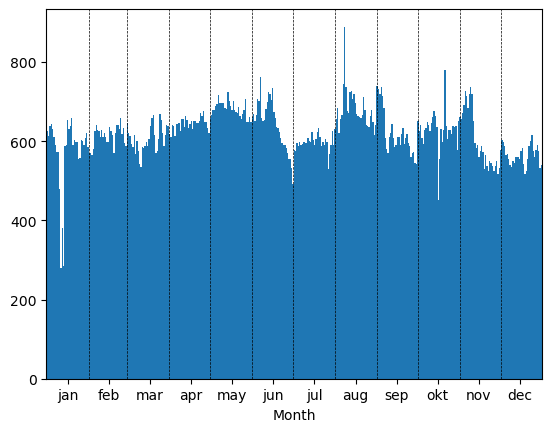

In [40]:
#viewtime = sum_by_day['VIEWABLETIME']
viewtime = sum_by_day['VIEWABLETIME'] / sum_by_day['REQUESTEDSESSIONS'] * 100

fig, ax = plt.subplots()
viewtime.plot.bar(width=1)
for i in range(2,13):
    month = str(i) if i >= 10 else f"0{i}"
    ax.axvline(sum_by_day.index.searchsorted(f"{month}-01"), color="black", lw=0.5, linestyle="--", label="lancement")
ax.set_xticks([i*30.3 + 15 for i in range(12)])
ax.set_xticklabels(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'okt', 'nov', 'dec'], rotation=0)
ax.set_xlabel('Month')


print(f'Day with maximum: {viewtime.idxmax()}')

Percentage of successful sessions on certain day of the year (2018 + 2019):

Day with maximum: 08-08


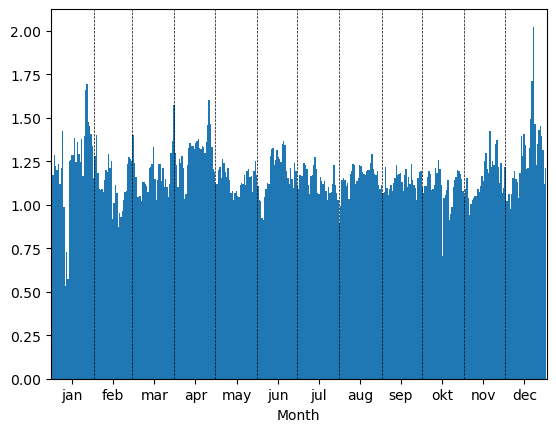

In [41]:
successful_sessions = sum_by_day['SESSIONSWITHINTERACTION'] / sum_by_day['REQUESTEDSESSIONS'] * 100

fig, ax = plt.subplots()
successful_sessions.plot.bar(width=1)
for i in range(2,13):
    month = str(i) if i >= 10 else f"0{i}"
    ax.axvline(sum_by_day.index.searchsorted(f"{month}-01"), color="black", lw=0.5, linestyle="--", label="lancement")
ax.set_xticks([i*30.3 + 15 for i in range(12)])
ax.set_xticklabels(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'okt', 'nov', 'dec'], rotation=0)
ax.set_xlabel('Month')


In [66]:
successful_sessions.sort_values(ascending=False)[:10]

UTCDATE
12-22    2.023385
12-21    1.711540
01-27    1.694770
01-26    1.661316
04-27    1.604225
04-01    1.571179
12-20    1.493715
01-28    1.478306
04-28    1.467048
12-23    1.466333
dtype: float64

#### Success of campaigns

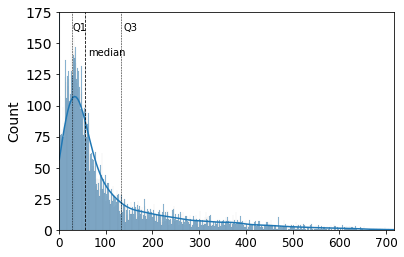

In [27]:
sns.histplot(data=length_of_campaigns['LENGTH'], discrete=True, kde=True)
plt.xlabel('')
plt.axvline(length_of_campaigns['LENGTH'].median(), color="black", lw=0.8, linestyle="--")
plt.text(length_of_campaigns['LENGTH'].median() + 5, 140, 'median')
plt.axvline(length_of_campaigns['LENGTH'].quantile(0.25), color="black", lw=0.5, linestyle="--")
plt.text(length_of_campaigns['LENGTH'].quantile(0.25), 160, 'Q1')
plt.axvline(length_of_campaigns['LENGTH'].quantile(0.75), color="black", lw=0.5, linestyle="--")
plt.text(length_of_campaigns['LENGTH'].quantile(0.75) + 5, 160, 'Q3')
plt.xlim((0, max(length_of_campaigns['LENGTH'])))
plt.ylim((0, 175))
plt.savefig('report/fig/length.png')
plt.show()

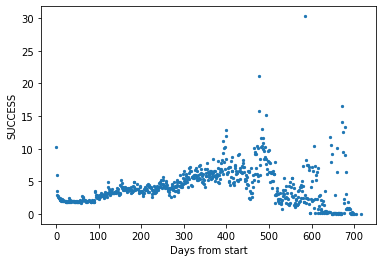

In [13]:
sns.regplot(data=campaigns_start_in, x='DAYSFROMSTART', y='SUCCESS', x_estimator=np.mean, x_ci=None,
            scatter_kws={'s': 5}, fit_reg=False)
plt.xlabel('Days from start')
plt.savefig('report/fig/success_days.png')
plt.show()

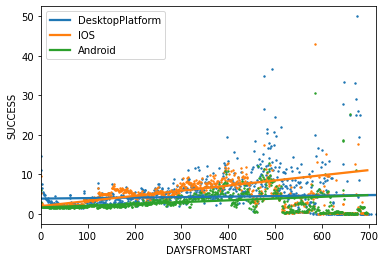

In [145]:
for platform in campaigns_start_in['PLATFORM'].unique()[:3]:
    sns.regplot(data=campaigns_start_in[campaigns_start_in['PLATFORM'] == platform], x='DAYSFROMSTART', y='SUCCESS',
                x_estimator=np.mean, x_ci=None, order=1, scatter_kws={'s': 2})
plt.legend(labels=campaigns_start_in['PLATFORM'].unique()[:3])


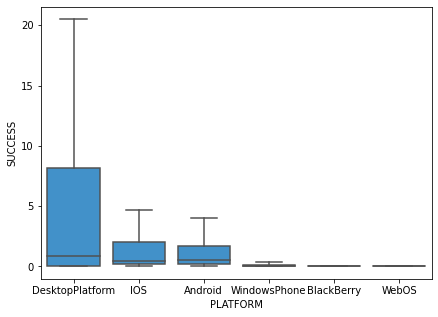

In [12]:
fg, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(data=campaigns_platforms, x='PLATFORM', y='SUCCESS', order=platform_success.index, color='#2b95e0', showfliers=False)
plt.savefig('report/fig/platforms_success.png')
plt.show()

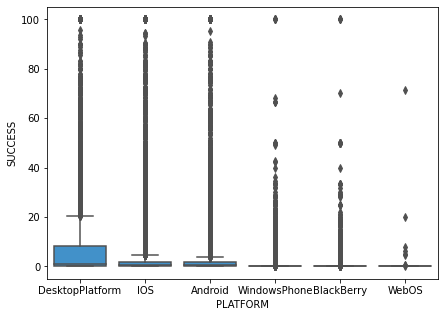

In [11]:
fg, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(data=campaigns_platforms, x='PLATFORM', y='SUCCESS', order=platform_success.index, color='#2b95e0')
plt.show()